# Exploratory Data Analysis

In this notebook I'll conduct an exploration of the "Maven Fuzzy Factory" dataset, which simulates sales for a fictitious e-commerce site selling stuffed animals. The work to be done includes profiling, cleaning, and visualizing the data.

## About the source

The [original dataset](https://mavenanalytics.io/data-playground/toy-store-e-commerce-database) was created by Maven Analytics who supplies it for free under a Public Domain license. I do not claim to own or have any rights over the dataset.

## Relevant business questions to answer

Some relevant e-commerce metrics that'll be studied in this project are:
* Most popular product
* Least popular product
* Conversion rate
* Average order value

Additional questions can be formulated after skimming over the data.

## Importing required libraries

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the data dictionary

The dataset comes with a data dictionary detailing the relationships between the different tables.

In [68]:
data_dict = pd.read_csv('../data/raw/maven_fuzzy_factory_data_dictionary.csv')
data_dict.info()
data_dict.head()

<class 'pandas.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Table        36 non-null     str  
 1   Field        36 non-null     str  
 2   Description  36 non-null     str  
dtypes: str(3)
memory usage: 996.0 bytes


,Table,Field,Description
0,orders,order_id,Unique identifier for each order (PK)
1,orders,created_at,Timestamp when the order was placed
2,orders,website_session_id,Unique identifier for the website session (FK)
3,orders,user_id,Unique identifier for the user (FK)
4,orders,primary_product_id,Unique identifier for the primary product in t...


Seems like the data dictionary loaded correctly. How many tables does the dictionary describe?

In [69]:
count = 0
for table in list(data_dict['Table'].unique()):
    print('\''+table+'\'')
    count += 1
print(f'tables described: {count}')

'orders'
'order_items'
'order_item_refunds'
'products'
'website_sessions'
'website_pageviews'
tables described: 6


The data dictionary packaged with the database seems to cover all (6) available files, let's explore them one by one.

What are the characteristics of the `orders` table?

In [70]:
descriptions = {}
descriptions['orders'] = data_dict[data_dict['Table'] == 'orders']
descriptions['orders']

,Table,Field,Description
0,orders,order_id,Unique identifier for each order (PK)
1,orders,created_at,Timestamp when the order was placed
2,orders,website_session_id,Unique identifier for the website session (FK)
3,orders,user_id,Unique identifier for the user (FK)
4,orders,primary_product_id,Unique identifier for the primary product in t...
5,orders,items_purchased,Number of items in the order
6,orders,price_usd,Total price for the items in the order
7,orders,cogs_usd,Cost of goods sold for the items in the order


What are the characteristics of the `order_items` table?

In [71]:
descriptions['order_items'] = data_dict[data_dict['Table'] == 'order_items']
descriptions['order_items']

,Table,Field,Description
8,order_items,order_item_id,Unique identifier for each order item (PK)
9,order_items,created_at,Timestamp when the order was placed
10,order_items,order_id,Unique identifier for the order the item belon...
11,order_items,product_id,Unique identifier for the product (FK)
12,order_items,is_primary_item,Binary flag with a value of 1 if it's the prim...
13,order_items,price_usd,Price of the product
14,order_items,cogs_usd,Cost of goods sold of the product


What are the characteristics of the `order_item_refunds` table?

In [72]:
descriptions['order_item_refunds'] = data_dict[data_dict['Table'] == 'order_item_refunds']
descriptions['order_item_refunds']

,Table,Field,Description
15,order_item_refunds,order_item_refund_id,Unique identifier for each refund (PK)
16,order_item_refunds,created_at,Timestamp when the refund was issued
17,order_item_refunds,order_item_id,Unique identifier for the order item that was ...
18,order_item_refunds,order_id,Unique identifier for the order the refunded i...
19,order_item_refunds,refund_amount_usd,Refund amount


What are the characteristic of the `products` table?

In [73]:
descriptions['products'] = data_dict[data_dict['Table'] == 'products']
descriptions['products'] 

,Table,Field,Description
20,products,product_id,Unique identifier for the product (PK)
21,products,created_at,Timestamp for when the product was launched
22,products,product_name,Name of the product


What are the characteristics of the `website_sessions` table?

In [74]:
descriptions['website_sessions'] = data_dict[data_dict['Table'] == 'website_sessions']
descriptions['website_sessions']

,Table,Field,Description
23,website_sessions,website_session_id,Unique identifier for the website session (PK)
24,website_sessions,created_at,Timestamp when the session started
25,website_sessions,user_id,Unique identifier for the user (FK)
26,website_sessions,is_repeat_session,Binary flag with a value of 1 if the user has ...
27,website_sessions,utm_source,UTM source parameter (traffic origin)
28,website_sessions,utm_campaign,UTM campaign parameter (marketing campaign name)
29,website_sessions,utm_content,UTM content parameter (ad/content variant)
30,website_sessions,device_type,Device category (mobile or desktop)
31,website_sessions,http_referer,URL for the UTM source


What are the characteristics of the `website_pageviews` table?

In [75]:
descriptions['website_pageviews'] = data_dict[data_dict['Table'] == 'website_pageviews']
descriptions['website_pageviews']

,Table,Field,Description
32,website_pageviews,website_pageview_id,Unique identifier for each website pageview (PK)
33,website_pageviews,created_at,Timestamp for the pageview
34,website_pageviews,website_session_id,Unique identifier for the website session the ...
35,website_pageviews,pageview_url,URL path for the pageview


## Data Context

* The `csv` data dictionary provided by the authors loaded correctly and contains context for the data.
* I've loaded table descriptions for the entire dataset into a dictionary object to work with.
* I've found information in the data dictionary to guide data type assignation.
* The presence of `user_id` in several tables indicates I only have a part of the database. In any case, `user_id` can be assumed to be the unique identifier for this store's customers and can be used to count them without accessing more information about them.
* I now understand the relationship between the tables and can create an ERD (entity relationship diagram) to serve as reference for the rest of my work.

![ERD](img/maven_fuzzy_factory_erd.png)

Diagram created with [SmartDraw](https://www.smartdraw.com)

## Extracting the rest of the tables

In [76]:
orders = pd.read_csv('../data/raw/orders.csv')
order_items = pd.read_csv('../data/raw/order_items.csv')
order_item_refunds = pd.read_csv('../data/raw/order_item_refunds.csv')
products = pd.read_csv('../data/raw/products.csv')
website_pageviews = pd.read_csv('../data/raw/website_pageviews.csv')
website_sessions = pd.read_csv('../data/raw/website_sessions.csv')

## Data profiling

In this section I'll proceed to check the data for specific errors, flaws, and/or possible contradictions. Correct datatypes will be asigned to all columns according to the context in the data dictionary. 

### Table: `orders`

In [77]:
descriptions['orders']

,Table,Field,Description
0,orders,order_id,Unique identifier for each order (PK)
1,orders,created_at,Timestamp when the order was placed
2,orders,website_session_id,Unique identifier for the website session (FK)
3,orders,user_id,Unique identifier for the user (FK)
4,orders,primary_product_id,Unique identifier for the primary product in t...
5,orders,items_purchased,Number of items in the order
6,orders,price_usd,Total price for the items in the order
7,orders,cogs_usd,Cost of goods sold for the items in the order


In [78]:
orders.info()
orders.head()

<class 'pandas.DataFrame'>
RangeIndex: 32313 entries, 0 to 32312
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            32313 non-null  int64  
 1   created_at          32313 non-null  str    
 2   website_session_id  32313 non-null  int64  
 3   user_id             32313 non-null  int64  
 4   primary_product_id  32313 non-null  int64  
 5   items_purchased     32313 non-null  int64  
 6   price_usd           32313 non-null  float64
 7   cogs_usd            32313 non-null  float64
dtypes: float64(2), int64(5), str(1)
memory usage: 2.0 MB


,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49


* Data loaded correctly.
* No missing values were detected.

In [79]:
orders.duplicated().sum()

np.int64(0)

* No whole-row duplicates were found.

In [80]:
orders['order_id'].duplicated().sum()

np.int64(0)

* No unique identifier duplicates where found.

In [81]:
orders.drop('created_at', axis=1).describe()

,order_id,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
count,32313.000000,32313.000000,32313.000000,32313.000000,32313.000000,32313.000000,32313.000000
mean,16157.000000,258292.288707,215691.622629,1.392474,1.238666,59.991636,22.355406
std,9328.103961,132427.649842,108402.203189,0.732277,0.426274,17.808771,6.238621
min,1.000000,20.000000,13.000000,1.000000,1.000000,29.990000,9.490000
25%,8079.000000,144828.000000,124135.000000,1.000000,1.000000,49.990000,19.490000
50%,16157.000000,263554.000000,221461.000000,1.000000,1.000000,49.990000,19.490000
75%,24235.000000,374799.000000,310542.000000,2.000000,1.000000,59.990000,22.490000
max,32313.000000,472818.000000,394273.000000,4.000000,2.000000,109.980000,41.980000


* Numeric columns show values within expected ranges.

#### Correct data types, `orders`

In [82]:
# set the created_at timestamp to datetime type
orders['created_at'] = pd.to_datetime(orders['created_at'], format='%Y-%m-%d %H:%M:%S')
# set ids to uint32, enough to cover the range of values
orders['order_id'] = orders['order_id'].astype('uint32')
orders['website_session_id'] = orders['website_session_id'].astype('uint32')
orders['user_id'] = orders['user_id'].astype('uint32')
orders['primary_product_id'] = orders['primary_product_id'].astype('uint32')
# set items purchased to uint16, more than enough to cover the range of values
orders['items_purchased'] = orders['items_purchased'].astype('uint16')
# set price_usd & cogs_usd to float32, more than enough to cover the range of values
orders['price_usd'] = orders['price_usd'].astype('float32')
orders['cogs_usd'] = orders['cogs_usd'].astype('float32')

#### Check date range in timestamp variable.

In [83]:
# check date range
print(orders['created_at'].min(), orders['created_at'].max())

2012-03-19 10:42:46 2015-03-19 05:38:31


We have 3 years of sales data.

#### Profiling results, `orders`

In [84]:
orders.info()

<class 'pandas.DataFrame'>
RangeIndex: 32313 entries, 0 to 32312
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            32313 non-null  uint32        
 1   created_at          32313 non-null  datetime64[us]
 2   website_session_id  32313 non-null  uint32        
 3   user_id             32313 non-null  uint32        
 4   primary_product_id  32313 non-null  uint32        
 5   items_purchased     32313 non-null  uint16        
 6   price_usd           32313 non-null  float32       
 7   cogs_usd            32313 non-null  float32       
dtypes: datetime64[us](1), float32(2), uint16(1), uint32(4)
memory usage: 1.0 MB


* The data loaded correctly and conforms to the structure mentioned in the data dictionary.
* Data was clean from the beginning, no missing values, no harmful duplicates, no typos.
* Timestamp variable, `created_at`, assigned correct type.
* Confirmation that I have 3 years of sales data.
* Other columns had their type adjusted to optimize memory.

## Univariate Analysis

### Table: `orders`

* Keys, primary or foreign, don't need to be analyzed.
* Focus on `items_purchased`, `price_usd`, `cogs_usd`

#### Column `orders['items_purchased']`

In [90]:
orders['items_purchased'].describe()

count    32313.000000
mean         1.238666
std          0.426274
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: items_purchased, dtype: float64

* Orders either contain one or two items. 
* Outlier detection is not required for this column.

Counting orders:
With 1 item, 24601 (76.13%)
With 2 items, 7712 (23.87%)


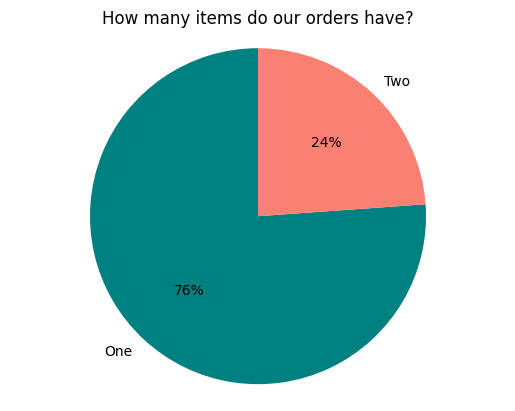

In [124]:
print('Counting orders:')
count_orders = orders.shape[0]
count_orders_with_one_item = orders[orders['items_purchased'] == 1]['items_purchased'].count()
percent_orders_with_one_item = round(count_orders_with_one_item / count_orders * 100, 2)
count_orders_with_two_items = orders[orders['items_purchased'] == 2]['items_purchased'].count()
percent_orders_with_two_items = round(count_orders_with_two_items / count_orders * 100, 2)
print(f'With 1 item, {count_orders_with_one_item} ({percent_orders_with_one_item}%)')
print(f'With 2 items, {count_orders_with_two_items} ({percent_orders_with_two_items}%)')
labels = ['One', 'Two']
data = [count_orders_with_one_item, count_orders_with_two_items]

# pie chart
plt.pie(data, 
        labels=labels,
        colors=['teal', 'salmon'], 
        autopct='%.0f%%',  
        startangle=90)
plt.title('How many items do our orders have?') # Add a title
plt.axis('equal') # Ensures the pie chart is drawn as a perfect circle
plt.show()

#### Column `orders['price_usd']`

In [105]:
orders['price_usd'].describe()

count    32313.000000
mean        59.991631
std         17.808771
min         29.990000
25%         49.990002
50%         49.990002
75%         59.990002
max        109.980003
Name: price_usd, dtype: float64

* The mean is too close to Q3, outlier detection is advised.
* Q1 and Q2 (median) overlap.

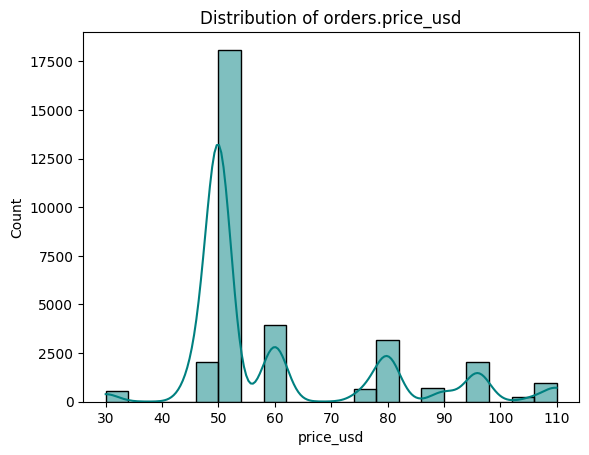

In [126]:
sns.histplot(x=orders['price_usd'],
             color='teal',
             kde=True,
             bins=20)
plt.title('Distribution of orders.price_usd') # Add a title
plt.show()

* Variable shows right-skewness.

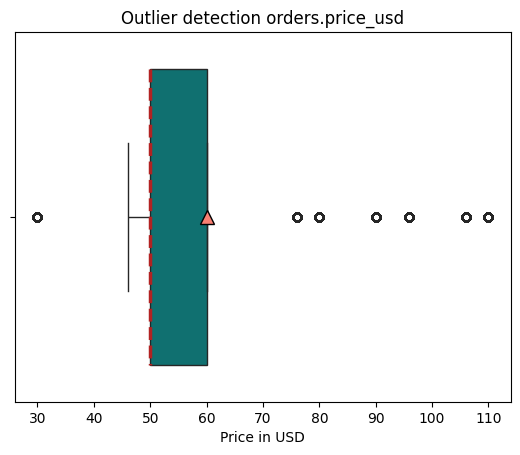

In [134]:
sns.boxplot(x=orders['price_usd'],
            color='teal',
            medianprops={'color':'firebrick',
                         'linestyle':'--',
                         'linewidth':'2.5'},
            showmeans=True,
            meanprops={'markerfacecolor':'salmon', 
                       'markeredgecolor':'black',
                       'markersize':'10'})
plt.xlabel('Price in USD')
plt.title('Outlier detection orders.price_usd')
plt.show()

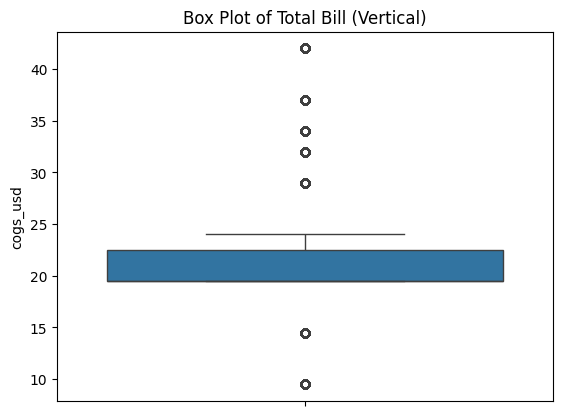

In [89]:
# plt.figure(figsize=(6, 4)) # Optional: adjust figure size
sns.boxplot(y=orders['cogs_usd'])
plt.title("Box Plot of Total Bill (Vertical)")
plt.show()

## Bivariate Analysis

## Key Findings

* Sales data from March, 2012 to March, 2015 (3 years).
* Orders contain either one (76%) or two (24%) items.